In [2]:
import pandas as pd

In [19]:
import json
from pandas import json_normalize


with open('./events.json') as f: 
    d = json.load(f) 
  

events = json_normalize(d['events']) 
events.head(3)


,timestamp,signature
0,2023-08-21T08:00:00,MALWARE-CNC Win.Trojan.Jadtre variant outbound...
1,2023-08-21T09:00:00,EXPLOIT Remote Windows Win32k elevation of pri...
2,2023-08-21T10:00:00,EXPLOIT Java JRE to Oracle WebLogic RCE


In [22]:
print(events.count())

timestamp    100
signature    100
dtype: int64


In [23]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  100 non-null    object
 1   signature  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [24]:
signature_counts = events['signature'].value_counts()
signature_counts


signature
MALWARE-CNC Win.Trojan.Jadtre variant outbound connection       12
EXPLOIT Remote Windows Win32k elevation of privilege attempt    11
EXPLOIT Java JRE to Oracle WebLogic RCE                         11
NETBIOS DCERPC NCACN-IP-TCP interfaces BO                       11
MALWARE-CNC User-Agent known malicious connecting IP            11
INDICATOR-COMPROMISE Suspicious inbound to mySQL port 3306      11
EXPLOIT Multiple IIS 6.0 attempt                                11
EXPLOIT Oracle 9i TNS Listener BO                               11
NETBIOS SMB-DS srvsvc NetrPathCanonicalize BO                   11
Name: count, dtype: int64

/var/folders/d6/lgb9r6jx50g0dvh_v1tqcym80000gn/T/ipykernel_28259/2151278509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signature_counts.index, y=signature_counts.values, palette="viridis")


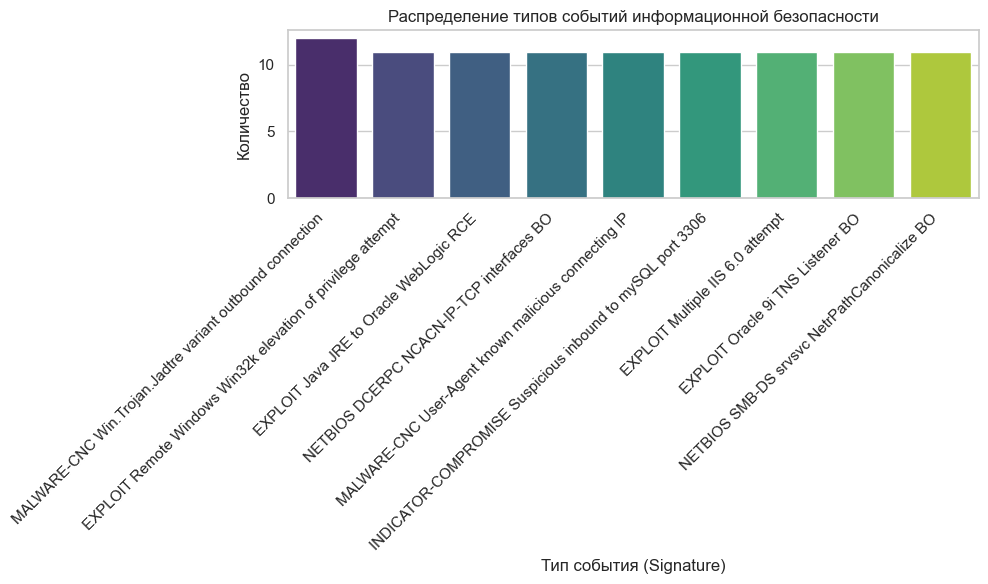

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

 # Установить стиль
sns.set_theme(style="whitegrid")

# Создать график
plt.figure(figsize=(10, 6))
sns.barplot(x=signature_counts.index, y=signature_counts.values, palette="viridis")

# Добавить заголовки и метки
plt.title('Распределение типов событий информационной безопасности')
plt.xlabel('Тип события (Signature)')
plt.ylabel('Количество')

# Повернуть метки по оси x, если они накладываются
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
   